# COVID-19 Detection in Chest X-Ray Images
The goal of this project is to build a model that identifies COVID-19, pneumonia in chest X-Ray images. The dataset is organized into 3 folders (COVID-19 cases, Normal , Pneumonia) and contains subfolders for each image category. There are 606 X-Ray images (JPEG). Data from [Mendeley](https://data.mendeley.com/datasets/fvk7h5dg2p/1). 

In [ ]:
# Download and unzip
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip


--2021-07-02 21:14:43--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fvk7h5dg2p-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.112.8
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.112.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198985388 (190M) [application/octet-stream]
Saving to: ‘dataroot/fvk7h5dg2p-1.zip’

fvk7h5dg2p-1.zip    100%[===================>] 189.77M  28.6MB/s    in 7.6s    

2021-07-02 21:14:51 (24.9 MB/s) - ‘dataroot/fvk7h5dg2p-1.zip’ saved [198985388/198985388]



In [ ]:
# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"fvk7h5dg2p-1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

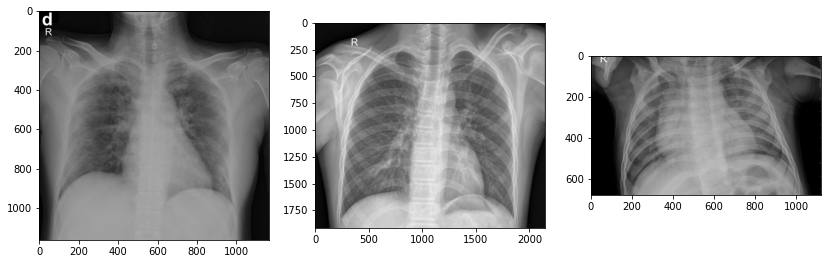

In [ ]:
# Load and preview images
import matplotlib.pyplot as plt
import numpy as np
import cv2

img_covid     = cv2.imread(dataroot+'COVID-19 cases/1-s2.0-S0929664620300449-gr2_lrg-d.jpg',0)
img_normal    = cv2.imread(dataroot+'Normal /IM-0011-0001-0001.jpeg',0)
img_pneumonia = cv2.imread(dataroot+'Pneumonia/person1650_virus_2854.jpeg',0)

plt.figure(figsize=(14,14))
plt.subplot(1,3,1)
plt.imshow(img_covid,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_normal,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_pneumonia,cmap='gray')

In [ ]:
!pip install pyradiomics

     |████████████████████████████████| 194kB 3.9MB/s 
     |████████████████████████████████| 112kB 4.6MB/s 
     |████████████████████████████████| 552kB 4.4MB/s 


In [ ]:
# Import some libraries
import SimpleITK as sitk
from radiomics import featureextractor
import numpy as np
path_img='Normal /IM-0011-0001-0001.jpeg'
im = sitk.ReadImage(dataroot+path_img)
im_arr = sitk.GetArrayFromImage(im)
im_arr2 = np.expand_dims(im_arr, axis=0)
im3d = sitk.GetImageFromArray(im_arr2)

Mask is mandatory for Pyradiomics
so, we create a simple one using cv2 thresh

In [ ]:

th, im_th = cv2.threshold(im_arr, 50, 255, cv2.THRESH_BINARY)

im_th = np.divide(im_th,255)
mask_arr_3d = np.expand_dims( im_th, axis=0)
mask_3d = sitk.GetImageFromArray(mask_arr_3d)
#mask3d= sitk.JoinSeries(mask_3d)

In [ ]:
im_th

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
!wget https://raw.githubusercontent.com/AIM-Harvard/pyradiomics/master/examples/exampleSettings/MR_2D_extraction.yaml
!wget https://github.com/AIM-Harvard/pyradiomics/blob/master/examples/exampleSettings/Params.yaml

--2021-07-02 22:05:05--  https://raw.githubusercontent.com/AIM-Harvard/pyradiomics/master/examples/exampleSettings/MR_2D_extraction.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2124 (2.1K) [text/plain]
Saving to: ‘MR_2D_extraction.yaml.1’

MR_2D_extraction.ya 100%[===================>]   2.07K  --.-KB/s    in 0s      

2021-07-02 22:05:06 (31.2 MB/s) - ‘MR_2D_extraction.yaml.1’ saved [2124/2124]

--2021-07-02 22:05:06--  https://github.com/AIM-Harvard/pyradiomics/blob/master/examples/exampleSettings/Params.yaml
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Params.yaml’

Params.yaml       

In [ ]:
# Load up the segmentations, 1 to 10 and extract the features
params = os.path.join(os.getcwd(), '..', 'examples', 'exampleSettings', '/content/MR_2D_extraction.yaml')

extractor = featureextractor.RadiomicsFeatureExtractor(params)
# hang on to all our features

features= extractor.execute ( im3d, mask_3d)


Image too small to apply LoG filter, size: [1072  958    1]


In [ ]:


print("Result type:", type(features))  # result is returned in a Python ordered dictionary
print("Calculated features")
for key, value in features.items():
    print( "\t", key, ":", value)



Result type: <class 'collections.OrderedDict'>
Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0.1
	 diagnostics_Versions_Numpy : 1.19.5
	 diagnostics_Versions_SimpleITK : 2.0.2
	 diagnostics_Versions_PyWavelet : 1.1.1
	 diagnostics_Versions_Python : 3.7.10
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': True, 'normalizeScale': 100, 'removeOutliers': None, 'resampledPixelSpacing': [2, 2, 0], 'interpolator': 'sitkBSpline', 'preCrop': True, 'padDistance': 10, 'distances': [1], 'force2D': True, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 5, 'voxelArrayShift': 300}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}, 'LoG': {'sigma': [2.0, 3.0, 4.0, 5.0]}, 'Wavelet': {}}
	 diagnostics_Image-original_Hash : 36b175417fd58edc7b9cb968b4ecee6b4e9f2f38
	 diagnostics_Image-original_Dimensionality : 3D
	 diagnostics_Image-original_Spacing : (1.0, 1.0, 1.0)
	 diagnostic

NOT important code below

In [ ]:
# Download the zip file if it does not exist
import os, zipfile
import pandas as pd
import seaborn as sns

from six.moves import urllib

url = "http://www.spl.harvard.edu/publications/bitstream/download/5270"
filename = 'example_data/Tumorbase.zip'
if not os.path.isfile(filename):
    if not os.path.isdir('example_data'):
        os.mkdir('example_data')
    print ("retrieving")
    urllib.request.urlretrieve(url, filename)
else:
    print ("file already downloaded")
    
extracted_path = 'example_data/tumorbase'
if not os.path.isdir(extracted_path):
    print ("unzipping")
    z = zipfile.ZipFile(filename)
    z.extractall('example_data')
    print ("done unzipping")

In [ ]:
# Load up the segmentations, 1 to 10 and extract the features
params = os.path.join(os.getcwd(), '..', 'examples', 'exampleSettings', 'Params.yaml')

extractor = featureextractor.RadiomicsFeatureExtractor(params)
# hang on to all our features
features = {}

for case_id in range(1,11):
    path = 'example_data/tumorbase/AutomatedSegmentation/case{}/'.format(case_id)
    image = sitk.ReadImage(path + "grayscale.nrrd")
    mask = sitk.ReadImage(path + "segmented.nrrd")
    # Tumor is in label value 6
    features[case_id] = extractor.execute ( image, mask, label=6 )
    

# A list of the valid features, sorted
feature_names = list(sorted(filter ( lambda k: k.startswith("original_"), features[1] )))